# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

from seaborn import load_dataset

%matplotlib notebook

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [40]:
# Criando a matriz de design e a matriz y
y, X = patsy.dmatrices('tip ~ sex + smoker + net_bill', data=tips)

# Ajustando o modelo
model = sm.OLS(y, X)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     40.28
Date:                Mon, 01 May 2023   Prob (F-statistic):           4.03e-21
Time:                        21:47:07   Log-Likelihood:                -375.19
No. Observations:                 244   AIC:                             758.4
Df Residuals:                     240   BIC:                             772.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2386      0.215      5.768      0.000       0.816       1.662
sex[T.Female]    -0.0135      0.153     -0.088      0.930      -0.316       0.289
smoker[T.No]      0.1383      0.150      0.920      0.359      -0.158       0.434
net_bill          0.1000      0.009     10.862      0.000       0.082       0.118
==============================================================================
Omnibus:                       36.851   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.361
Skew:                           0.807   Prob(JB):                     3.89e-15
Kurtosis:                       4.981   Cond. No.                         61.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


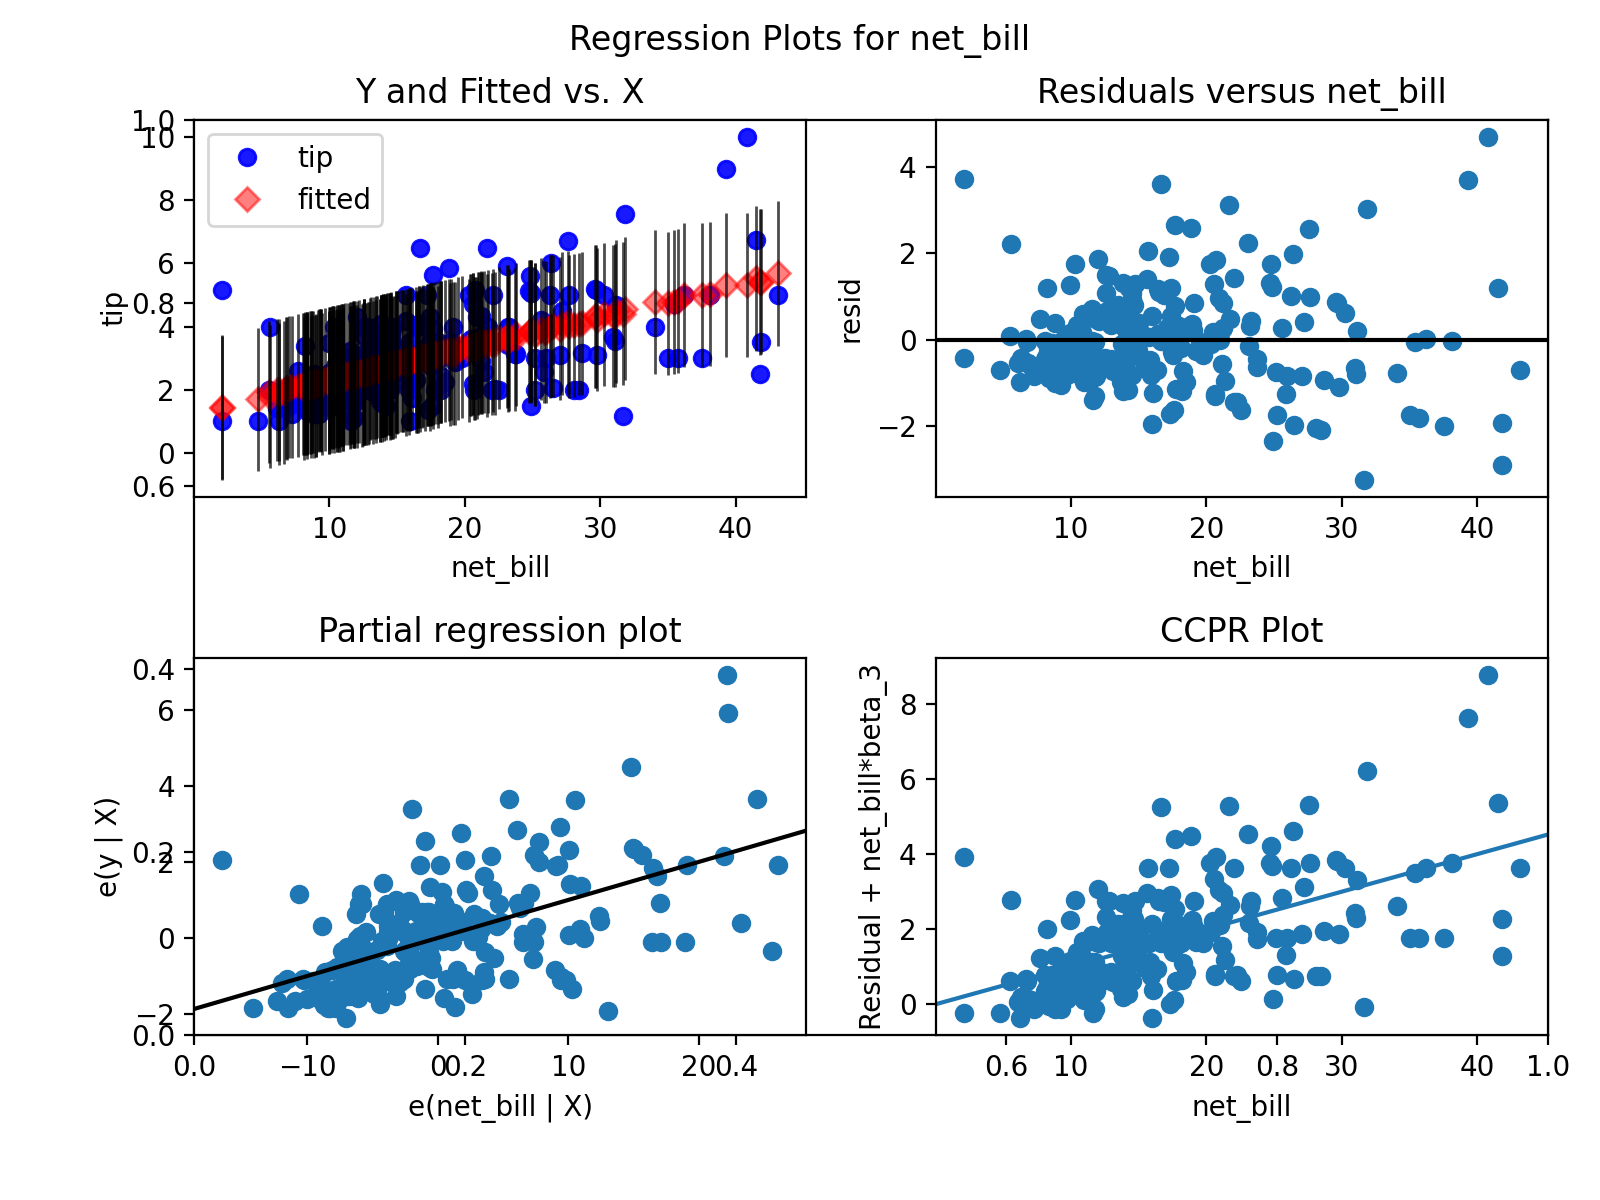

eval_env: 1


In [41]:
# Obtendo os resíduos
residuals = result.resid

# Gráfico de dispersão dos resíduos em função de net_bill
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.plot_regress_exog(result, 'net_bill', fig=fig)
plt.show()

In [45]:
# Modelo com net_bill logarítmico
tips['log_net_bill'] = np.log(tips['net_bill'])

model_log = smf.ols(formula='tip ~ sex + smoker + log_net_bill', data=tips)
result_log = model_log.fit()

result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     33.43
Date:                Mon, 01 May 2023   Prob (F-statistic):           4.31e-18
Time:                        21:50:24   Log-Likelihood:                -382.35
No. Observations:                 244   AIC:                             772.7
Df Residuals:                     240   BIC:                             786.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2716      0.462     -2.752      0.006      -2.182      -0.361
sex[T.Female]    -0.0227      0.158     -0.144      0.886      -0.334       0.289
smoker[T.No]      0.0433      0.154      0.281      0.779      -0.261       0.347
log_net_bill      1.5678      0.159      9.879      0.000       1.255       1.880
==============================================================================
Omnibus:                       74.660   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.548
Skew:                           1.314   Prob(JB):                     1.74e-49
Kurtosis:                       6.896   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Modelo com net_bill polinomial
tips['net_bill_squared'] = tips['net_bill'] ** 2

model_poly = smf.ols(formula='tip ~ sex + smoker + net_bill + net_bill_squared', data=tips)
result_poly = model_poly.fit()

result_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     30.28
Date:                Mon, 01 May 2023   Prob (F-statistic):           2.17e-20
Time:                        21:50:22   Log-Likelihood:                -374.93
No. Observations:                 244   AIC:                             759.9
Df Residuals:                     239   BIC:                             777.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0182      0.373      2.729      0.007       0.283       1.753
sex[T.Female]       -0.0090      0.154     -0.059      0.953      -0.312       0.294
smoker[T.No]         0.1263      0.151      0.834      0.405      -0.172       0.425
net_bill             0.1261      0.037      3.387      0.001       0.053       0.199
net_bill_squared    -0.0006      0.001     -0.723      0.470      -0.002       0.001
==============================================================================
Omnibus:                       41.946   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.775
Skew:                           0.870   Prob(JB):                     1.06e-18
Kurtosis:                       5.262   Cond. No.                     2.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Escolha do melhor modelo
Inicialmente pode-se escolher o modelo com a transformação de "net_bill" em log, que apresentou um R-squared de 0.295, indicando que cerca de 29.5% da variabilidade da gorjeta é explicada pelas variáveis incluídas no modelo.

Apesar do modelo com a transformação de polinômio ter retornado um R-squared de 0.336, ele não é necessariamente o melhor pois outros fatores devem ser considerados. Por exemplo, no modelo do polinômio em questão, o coeficiente associado a "net_bill_squared" não é estatisticamente significativo (p = 0.470), o que indica que não há evidência suficiente para afirmar que a inclusão do termo quadrático melhora o ajuste do modelo.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [47]:
# Criar a matriz de design e a matriz y
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + net_bill', tips)

# Aplicar o modelo de regressão linear
model = sm.OLS(y, X)
result = model.fit()

# Imprimir o summary
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     36.43
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.95e-19
Time:                        22:19:12   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             203.0
Df Residuals:                     240   BIC:                             217.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4631      0.069      6.730      0.000       0.328       0.599
sex[T.Female]     0.0016      0.049      0.032      0.975      -0.095       0.098
smoker[T.No]      0.0429      0.048      0.891      0.374      -0.052       0.138
net_bill          0.0305      0.003     10.347      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.323   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.981
Skew:                          -0.169   Prob(JB):                        0.371
Kurtosis:                       3.285   Cond. No.                         61.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


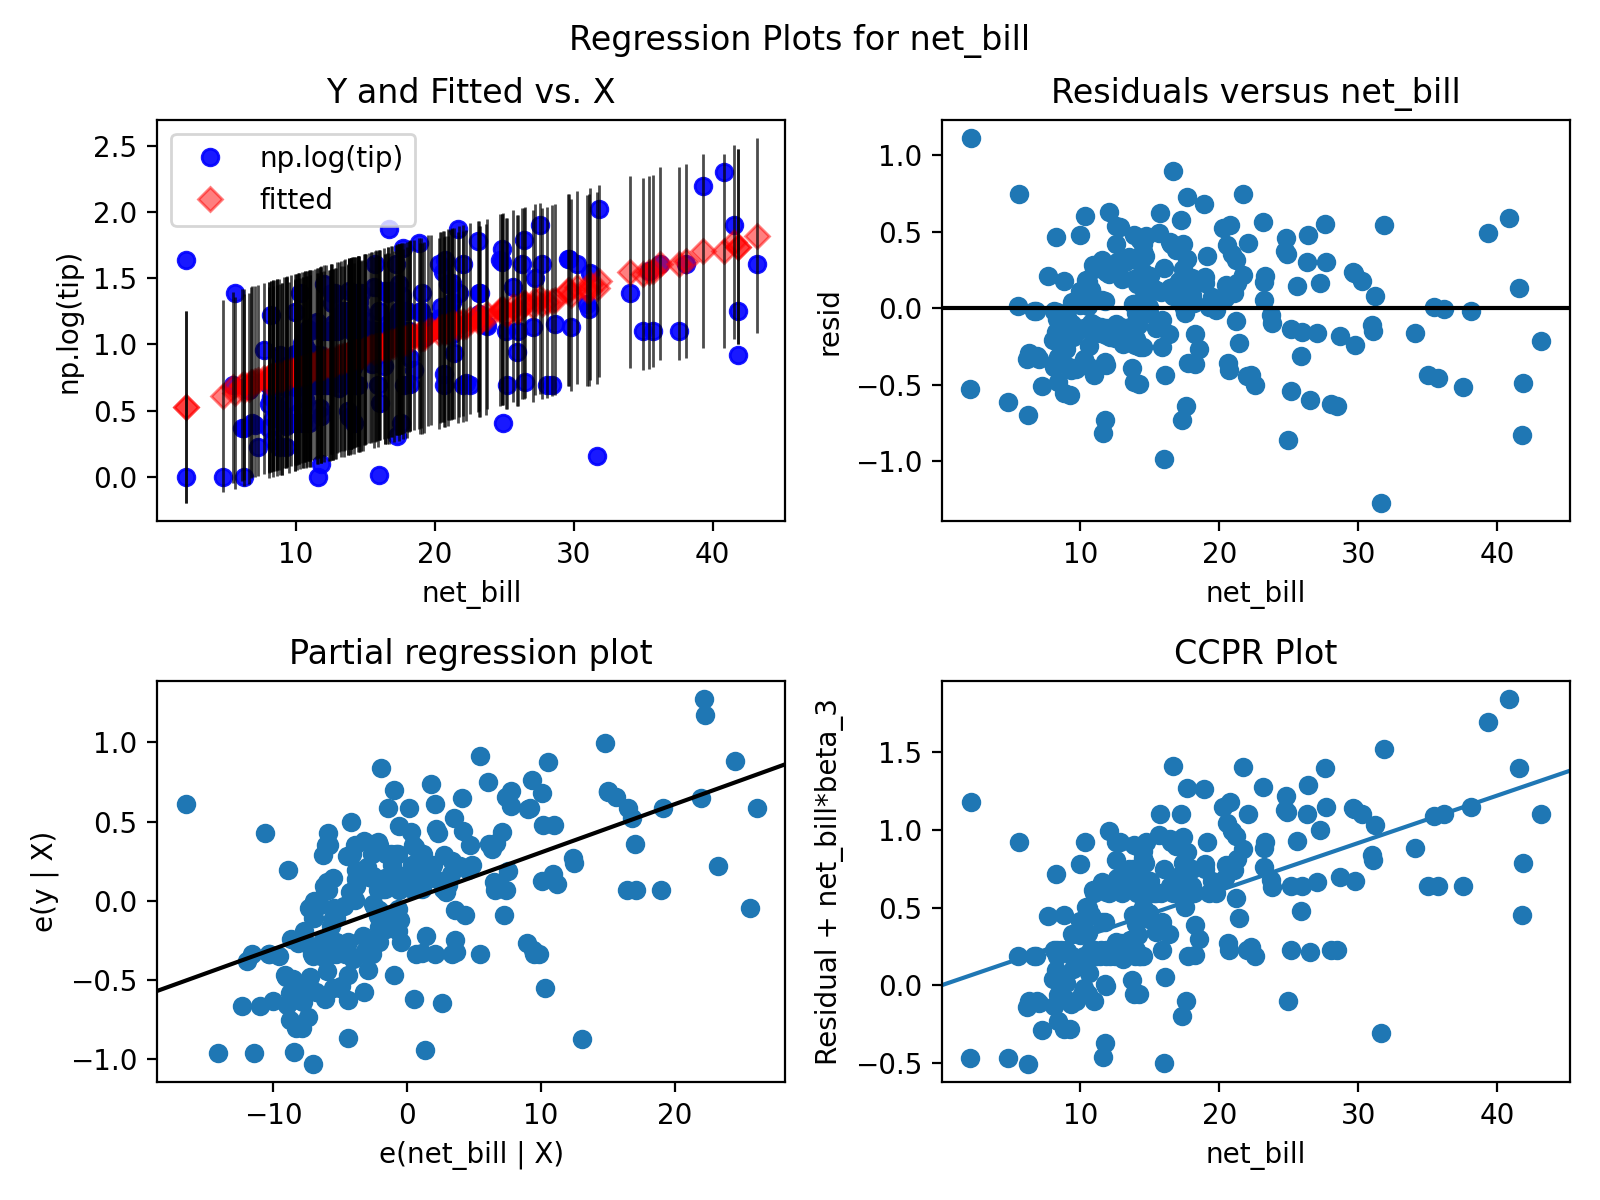

eval_env: 1


In [49]:
# Observar o gráfico de resíduos em função de net_bill
sm.graphics.plot_regress_exog(result, 'net_bill', fig=plt.figure(figsize=(8, 6)))
plt.show()

In [56]:
# Modelo com net_bill logarítmico
tips['log_net_bill'] = np.log(tips['net_bill'])

y_log, X_log = patsy.dmatrices('np.log(tip_pct) ~ sex + smoker + log_net_bill', data=tips)
model_log = sm.OLS(y_log, X_log)
result_log = model_log.fit()

result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     33.28
Date:                Mon, 01 May 2023   Prob (F-statistic):           5.05e-18
Time:                        22:23:58   Log-Likelihood:                -96.300
No. Observations:                 244   AIC:                             200.6
Df Residuals:                     240   BIC:                             214.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.4087      0.143     -2.856      0.005      -0.691      -0.127
sex[T.Female]     0.0044      0.049      0.089      0.929      -0.092       0.101
smoker[T.No]      0.0153      0.048      0.321      0.748      -0.079       0.109
log_net_bill     -0.4836      0.049     -9.841      0.000      -0.580      -0.387
==============================================================================
Omnibus:                       13.434   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.494
Skew:                           0.161   Prob(JB):                     2.39e-07
Kurtosis:                       4.702   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Modelo com net_bill polinomial
tips['net_bill_squared'] = tips['net_bill'] ** 2

y_poly, X_poly = patsy.dmatrices('np.log(tip_pct) ~ sex + smoker + net_bill + net_bill_squared', data=tips)
model_poly = sm.OLS(y_poly, X_poly)
result_poly = model_poly.fit()

result_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     21.04
Date:                Mon, 01 May 2023   Prob (F-statistic):           7.08e-15
Time:                        22:23:30   Log-Likelihood:                -101.93
No. Observations:                 244   AIC:                             213.9
Df Residuals:                     239   BIC:                             231.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.9955      0.122     -8.168      0.000      -1.236      -0.755
sex[T.Female]        0.0082      0.050      0.163      0.871      -0.091       0.107
smoker[T.No]         0.0093      0.049      0.187      0.852      -0.088       0.107
net_bill            -0.0591      0.012     -4.862      0.000      -0.083      -0.035
net_bill_squared     0.0008      0.000      2.831      0.005       0.000       0.001
==============================================================================
Omnibus:                       31.628   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.663
Skew:                           0.431   Prob(JB):                     4.64e-26
Kurtosis:                       6.276   Cond. No.                     2.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
# Converter coluna "sex" em formato numérico
tips['sex_numeric'] = pd.get_dummies(tips['sex'], drop_first=True)

# Criar matriz de design
y, X = patsy.dmatrices('np.log(tip) ~ sex_numeric + smoker + net_bill', data=tips, return_type='dataframe')

# Ajustar o modelo
model = sm.OLS(y, X)
result = model.fit()

# Calcular o R-squared na escala de tip (sem o log)
y_tip = np.exp(result.predict(X))
ssr = np.sum((tips['tip'] - y_tip) ** 2)
sst = np.sum((tips['tip'] - np.mean(tips['tip'])) ** 2)
r_squared_tip = 1 - (ssr / sst)

print("R-squared do modelo final na escala de tip (sem o log):", r_squared_tip)

R-squared do modelo final na escala de tip (sem o log): 0.3068408482168613


### Escolha do melhor modelo:

Comparando com o modelo do item 1, o modelo final tem um coeficiente de determinação ligeiramente menor. Portanto, o modelo do item 1 tem um melhor coeficiente de determinação na escala de tip.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [60]:
data = pd.read_csv("previsao_de_renda.csv")
data

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [96]:
# 1)
model = smf.ols(formula='renda ~ tempo_emprego', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        23:25:49   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>


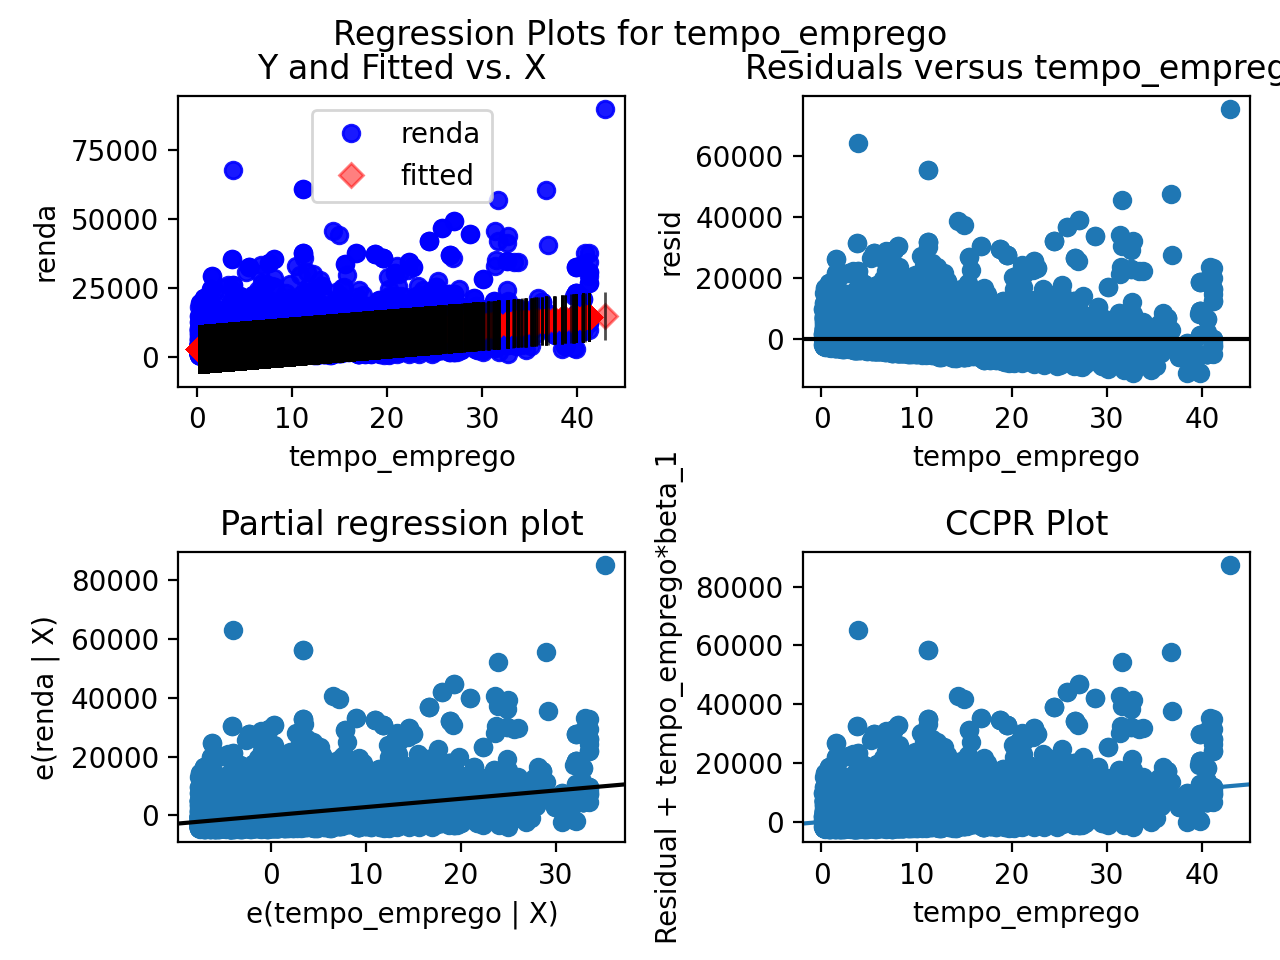

eval_env: 1


In [66]:
# 2 - Parte 1
# Para fazer uma análise de resíduos e melhorar a regressão, podemos usar algumas técnicas. Aqui estão algumas:

# Plotar o gráfico de resíduos para visualizar a relação entre a variável explicativa e os resíduos.

fig = sm.graphics.plot_regress_exog(model, 'tempo_emprego')
plt.show()

<IPython.core.display.Javascript object>


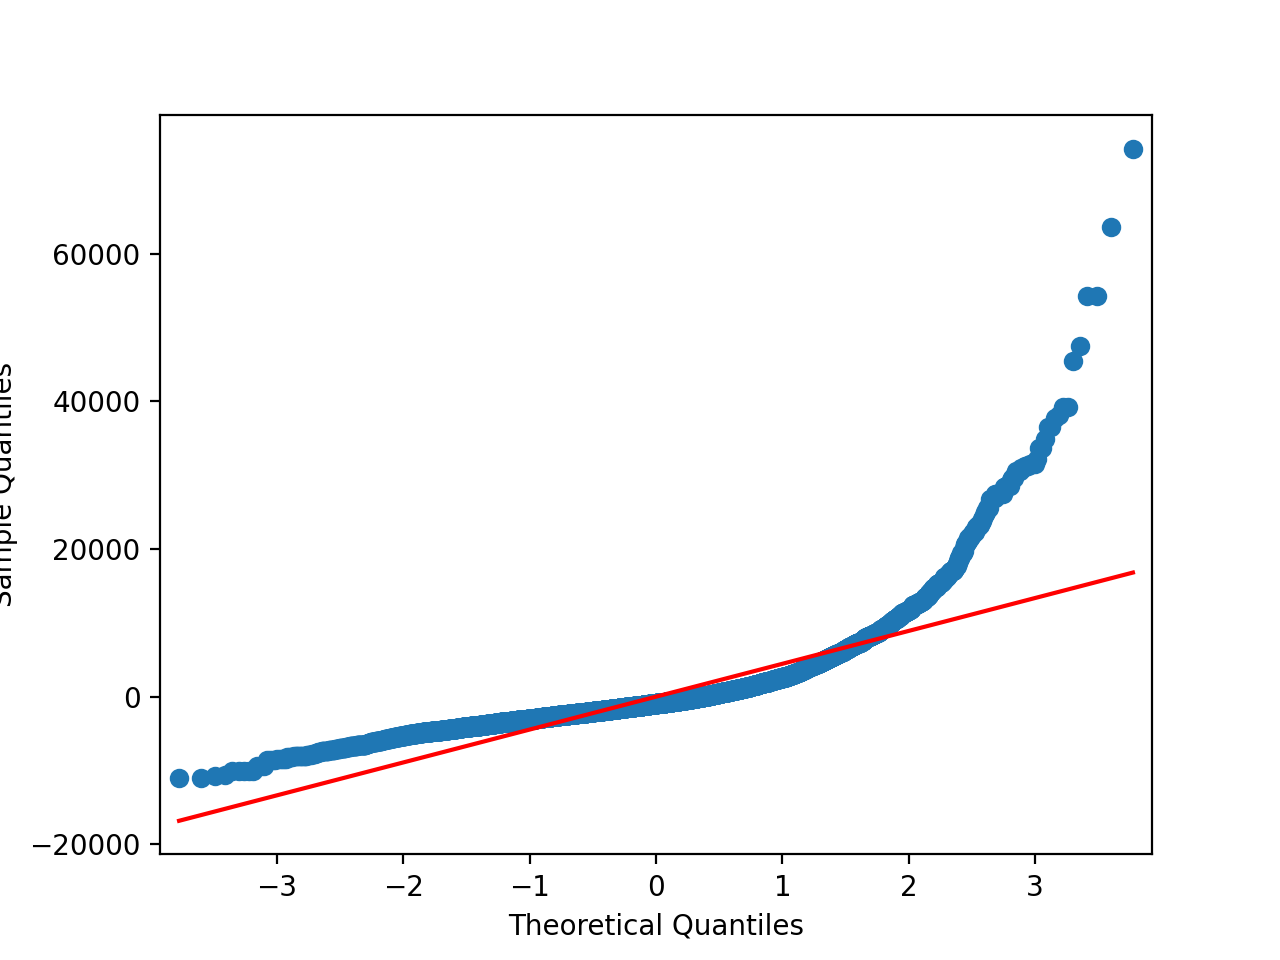

In [91]:
# 2 - Parte 2

# Verificar a normalidade dos resíduos.
# Usar o gráfico de probabilidade normal para verificar se os resíduos seguem uma distribuição normal.

sm.qqplot(model.resid, line='s')
plt.show()

<IPython.core.display.Javascript object>


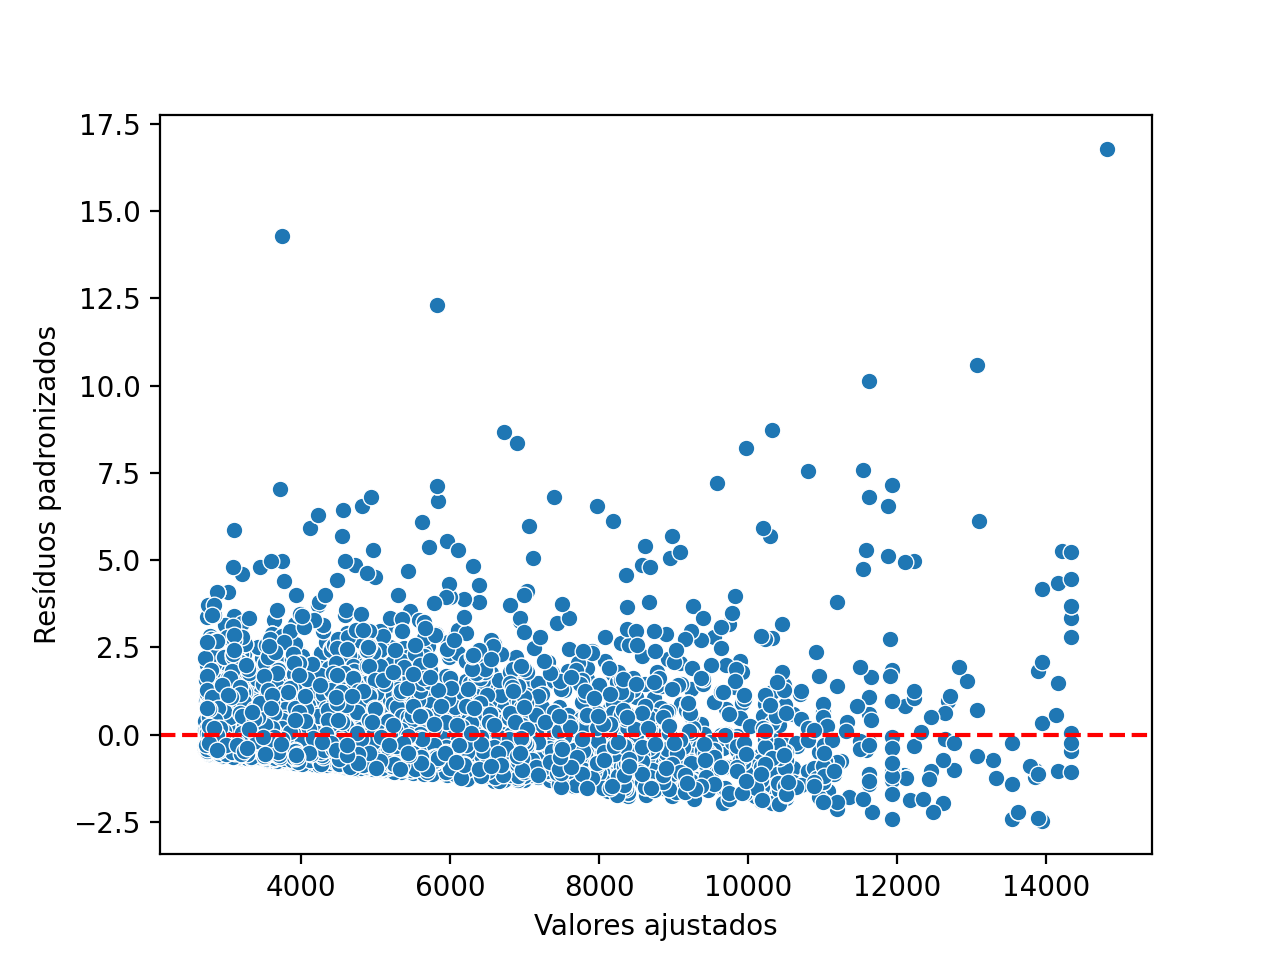

In [70]:
# 2 - Parte 3

# Usar o gráfico de dispersão dos resíduos padronizados em relação às variáveis explicativas.
# Verificar a homogeneidade da variância em diferentes níveis das variáveis explicativas.

fig, ax = plt.subplots()
sns.scatterplot(x=model.fittedvalues, y=standardized_residuals, ax=ax)
ax.axhline(0, color='red', linestyle='--')
ax.set_xlabel('Valores ajustados')
ax.set_ylabel('Resíduos padronizados')
plt.show()

In [92]:
# 3)
model_multiple = smf.ols(formula='renda ~ ' + ' + '.join(data.columns[1:]), data=data).fit()
model_multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.737e+30
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        23:22:32   Log-Likelihood:             2.7484e+05
No. Observations:               12466   AIC:                        -5.496e+05
Df Residuals:                   12424   BIC:                        -5.493e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -8.576e-11   2.52e-11     -3.402      0.001   -1.35e-10   -3.64e-11
data_ref[T.2015-02-01]            5.063e-11   3.16e-12     16.018      0.000    4.44e-11    5.68e-11
data_ref[T.2015-03-01]            1.108e-10   3.16e-12     35.093      0.000    1.05e-10    1.17e-10
data_ref[T.2015-04-01]            1.324e-10   3.17e-12     41.806      0.000    1.26e-10    1.39e-10
data_ref[T.2015-05-01]            1.037e-10   3.14e-12     33.031      0.000    9.76e-11     1.1e-10
data_ref[T.2015-06-01]            2.329e-11   3.17e-12      7.347      0.000    1.71e-11    2.95e-11
data_ref[T.2015-07-01]             4.88e-11   3.17e-12     15.378      0.000    4.26e-11     5.5e-11
data_ref[T.2015-08-01]            7.446e-11   3.18e-12     23.437      0.000    6.82e-11    8.07e-11
data_ref[T.2015-09-01]            8.535e-11   3.16e-12     26.980      0.000    7.92e-11    9.16e-11
data_ref[T.2015-10-01]            7.273e-11   3.15e-12     23.054      0.000    6.65e-11    7.89e-11
data_ref[T.2015-11-01]            2.856e-10   3.16e-12     90.458      0.000    2.79e-10    2.92e-10
data_ref[T.2015-12-01]            4.303e-11   3.16e-12     13.612      0.000    3.68e-11    4.92e-11
data_ref[T.2016-01-01]            6.987e-11   3.16e-12     22.137      0.000    6.37e-11    7.61e-11
data_ref[T.2016-02-01]            1.063e-10   3.16e-12     33.645      0.000       1e-10    1.12e-10
data_ref[T.2016-03-01]            1.264e-10   3.16e-12     39.994      0.000     1.2e-10    1.33e-10
sexo[T.M]                        -3.297e-14   1.36e-12     -0.024      0.981   -2.69e-12    2.63e-12
posse_de_veiculo[T.True]         -9.815e-13   1.27e-12     -0.773      0.440   -3.47e-12    1.51e-12
posse_de_imovel[T.True]          -9.237e-14   1.26e-12     -0.074      0.941   -2.55e-12    2.37e-12
tipo_renda[T.Bolsista]            1.141e-11   3.23e-11      0.353      0.724   -5.19e-11    7.47e-11
tipo_renda[T.Empresário]         -1.521e-14   1.36e-12     -0.011      0.991   -2.68e-12    2.65e-12
tipo_renda[T.Pensionista]         1.542e-11   2.19e-11      0.705      0.481   -2.74e-11    5.83e-11
tipo_renda[T.Servidor público]   -1.616e-12   1.96e-12     -0.825      0.409   -5.45e-12    2.22e-12
educacao[T.Pós graduação]         1.106e-12   1.62e-11      0.068      0.946   -3.06e-11    3.29e-11
educacao[T.Secundário]            6.807e-13   6.56e-12      0.104      0.917   -1.22e-11    1.35e-11
educacao[T.Superior completo]     9.758e-13   6.59e-12      0.148      0.882   -1.19e-11    1.39e-11
educacao[T.Superior incompleto]  -2.486e-12   7.05e-12     -0.352      0.725   -1.63e-11    1.13e-11
estado_civil[T.Separado]          3.445e-12   1.21e-11      0.285      0.776   -2.03e-11    2.71e-11
estado_civil[T.Solteiro]         -1.295e-12   1.19e-1

In [95]:
# 4)
model = smf.ols(formula='renda ~ sexo + tempo_emprego + tipo_renda + tipo_residencia + idade', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     285.4
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        23:24:44   Log-Likelihood:            -1.2203e+05
No. Observations:               12466   AIC:                         2.441e+05
Df Residuals:                   12453   BIC:                         2.442e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          631.1000    368.770      1.711      0.087     -91.747    1353.947
sexo[T.M]                         2333.4111     82.399     28.319      0.000    2171.897    2494.925
tipo_renda[T.Bolsista]            -281.4811   2160.016     -0.130      0.896   -4515.447    3952.484
tipo_renda[T.Empresário]          1073.2069     89.855     11.944      0.000     897.077    1249.336
tipo_renda[T.Pensionista]         1896.5648   1440.205      1.317      0.188    -926.460    4719.590
tipo_renda[T.Servidor público]     521.6391    130.213      4.006      0.000     266.402     776.876
tipo_residencia[T.Casa]           -281.4179    328.987     -0.855      0.392    -926.284     363.448
tipo_residencia[T.Com os pais]    -721.4327    368.444     -1.958      0.050   -1443.640       0.774
tipo_residencia[T.Comunitário]    -475.1482    634.447     -0.749      0.454   -1718.763     768.466
tipo_residencia[T.Estúdio]        -891.8324    547.930     -1.628      0.104   -1965.861     182.196
tipo_residencia[T.Governamental]  -973.2651    397.071     -2.451      0.014   -1751.586    -194.945
tempo_emprego                      299.0610      6.139     48.716      0.000     287.028     311.094
idade                               25.7478      4.453      5.782      0.000      17.020      34.476
==============================================================================
Omnibus:                    10053.156   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           424908.997
Skew:                           3.572   Prob(JB):                         0.00
Kurtosis:                      30.695   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
# 5)
residuals = model.resid
residuals

0          15.315420
1        2448.777863
2        1106.125778
3        3397.554360
4       -2442.805288
            ...     
14995   -1743.341549
14996   -3808.891879
14997   -1421.109178
14998    3248.136910
14999   -2393.740246
Length: 12466, dtype: float64

<IPython.core.display.Javascript object>


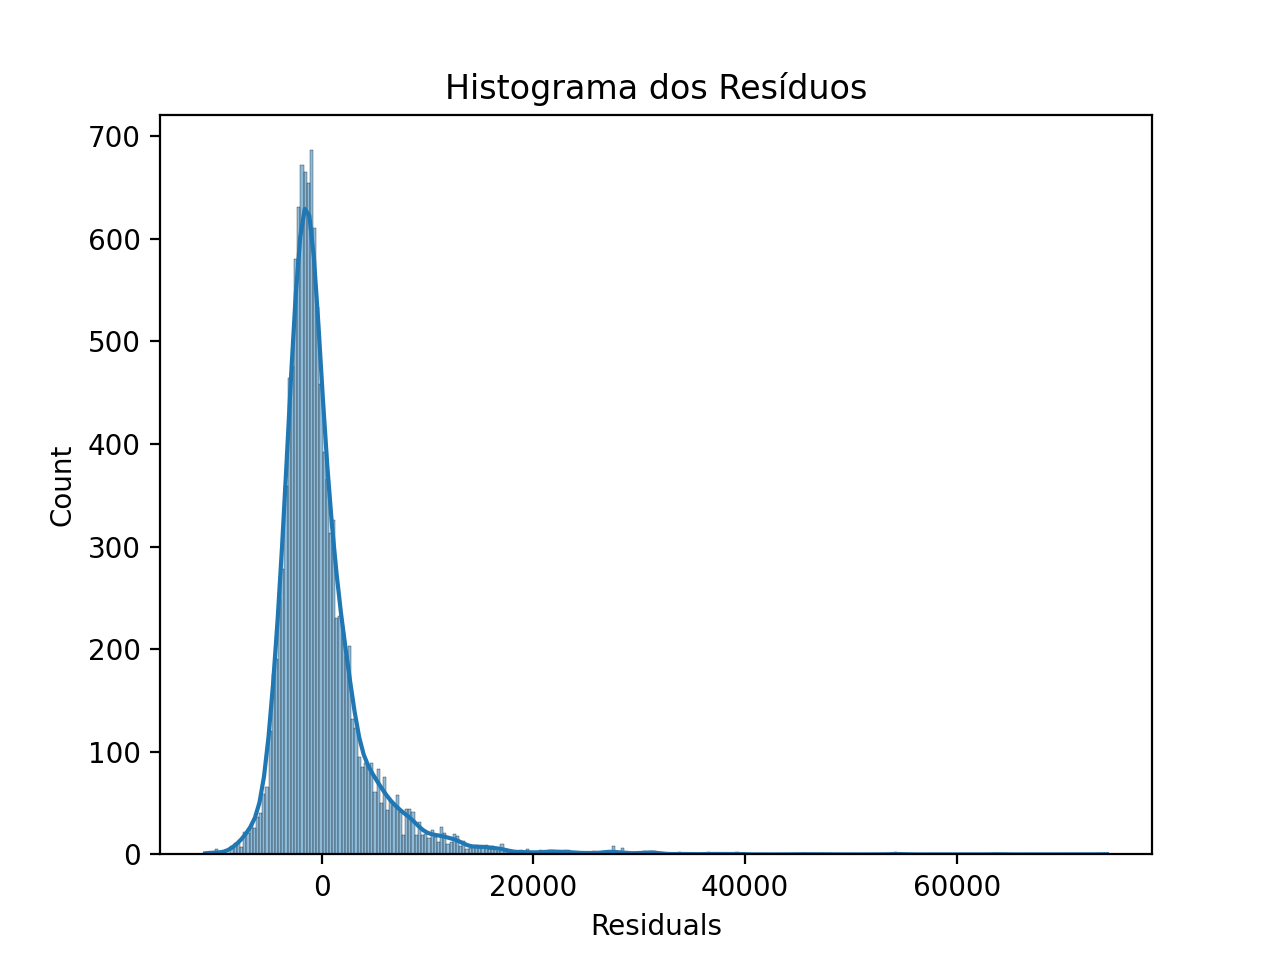

In [99]:
plt.subplots()
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histograma dos Resíduos')
plt.show()

<IPython.core.display.Javascript object>


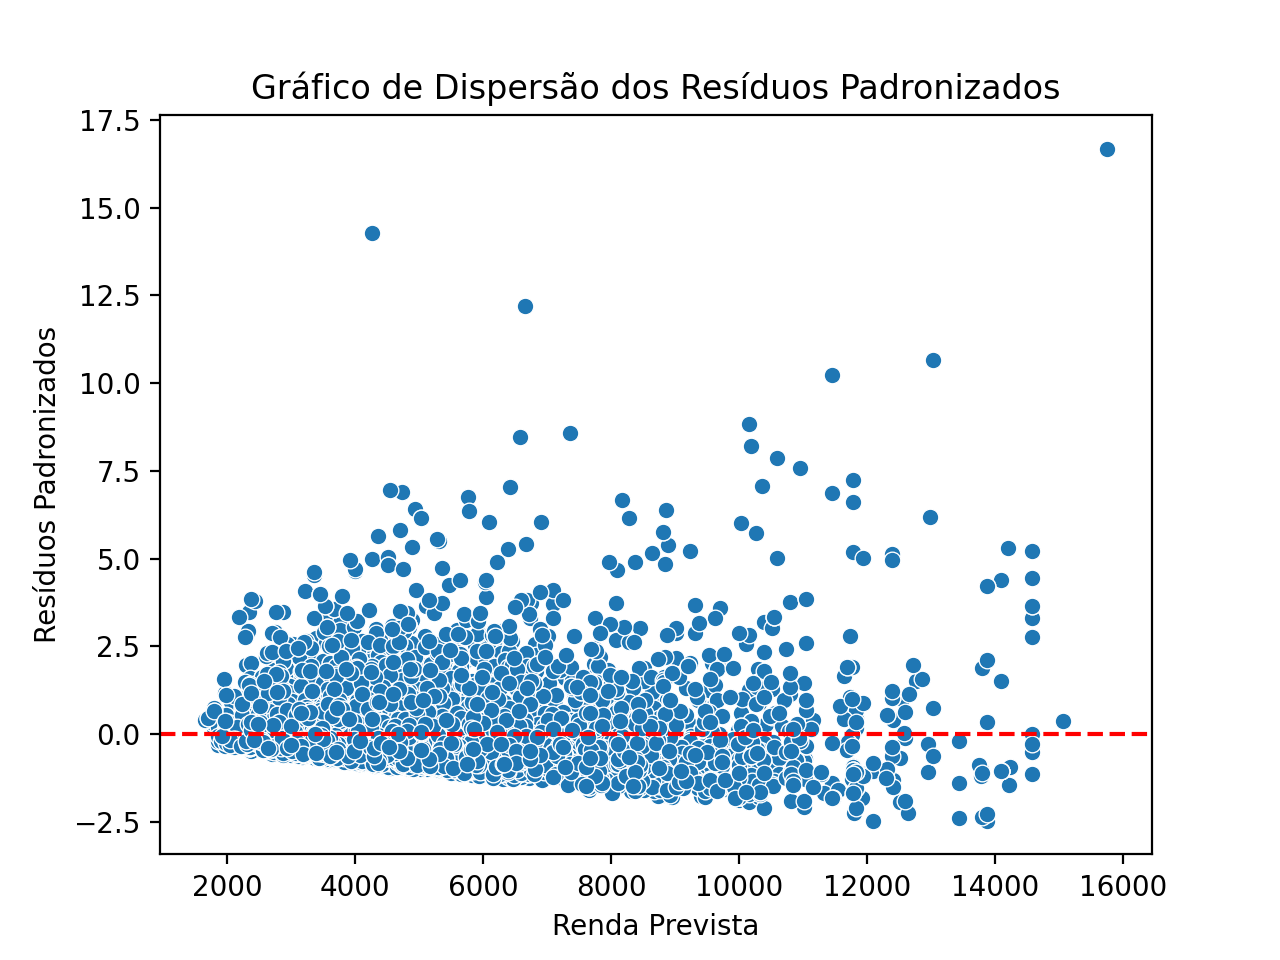

In [90]:
# 5)
standardized_residuals = model.get_influence().resid_studentized_internal

plt.subplots()
sns.scatterplot(x=model.fittedvalues, y=standardized_residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Renda Prevista')
plt.ylabel('Resíduos Padronizados')
plt.title('Gráfico de Dispersão dos Resíduos Padronizados')
plt.show()